# bitacora para analizar archivos ab1
tomado de 
http://biopython.org/wiki/ABI_traces

In [1]:
from Bio import SeqIO, SeqRecord
from Bio.Alphabet import IUPAC
from abifpy import Trace
from collections import defaultdict
import matplotlib.pyplot as plt

In [3]:
cd ../data/ab1

/Users/migueldelrio/Desktop/curso/data/ab1


In [4]:
ls

Nav1.8_(B11)-DG7A_G12_014.ab1* Nav1.8_(D12)-RW01_H03_015.ab1*


Seleccionar un archivo para leerlo

In [5]:
record = SeqIO.read('Nav1.8_(B11)-DG7A_G12_014.ab1', 'abi')

## graficado del electroferograma

In [6]:
record.annotations.keys()
record.annotations['abif_raw'].keys()
channels = ['DATA9', 'DATA10', 'DATA11', 'DATA12']
trace = defaultdict(list)

## qué contiene la variable channels?

In [7]:
for c in channels:
    trace[c] = record.annotations['abif_raw'][c]

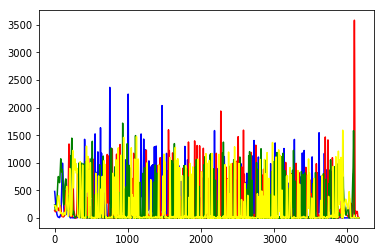

In [8]:
plt.plot(trace['DATA9'], color='blue')
plt.plot(trace['DATA10'], color='red')
plt.plot(trace['DATA11'], color='green')
plt.plot(trace['DATA12'], color='yellow')
plt.show()

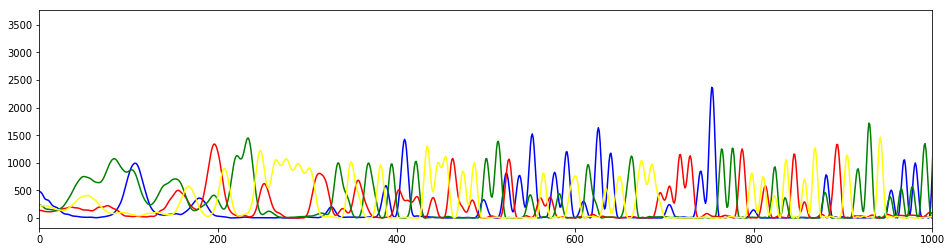

In [9]:
plt.figure(figsize=(16,4))
plt.plot(trace['DATA9'], color='blue')
plt.plot(trace['DATA10'], color='red')
plt.plot(trace['DATA11'], color='green')
plt.plot(trace['DATA12'], color='yellow')
plt.xlim(0,1000)  # se utiliza valores de 1000 como maximo
plt.show()

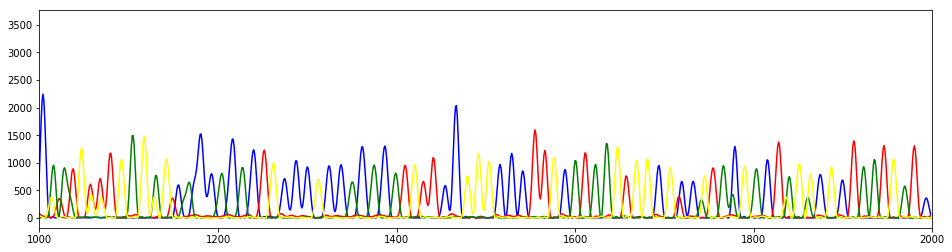

In [10]:
plt.figure(figsize=(16,4))
plt.plot(trace['DATA9'], color='blue')
plt.plot(trace['DATA10'], color='red')
plt.plot(trace['DATA11'], color='green')
plt.plot(trace['DATA12'], color='yellow')
plt.xlim(1000,2000)  # se utiliza valores de 1000 como maximo
plt.show()

In [11]:
def graficado(x1,x2):
    plt.figure(figsize=(16,4))
    plt.plot(trace['DATA9'], color='blue')
    plt.plot(trace['DATA10'], color='red')
    plt.plot(trace['DATA11'], color='green')
    plt.plot(trace['DATA12'], color='yellow')
    plt.xlim(x1,x2)  # se utiliza valores de 1000 como maximo
    plt.show()

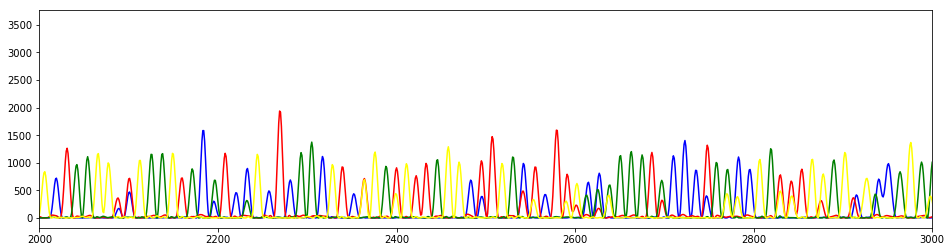

In [12]:
graficado (2000,3000)

In [13]:
intervalos = range(1000,6000,1000)
intervalos

range(1000, 6000, 1000)

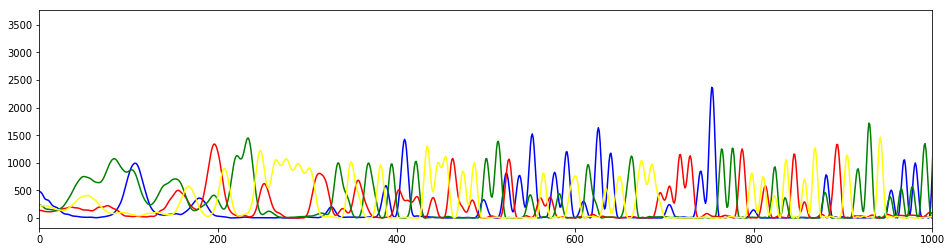

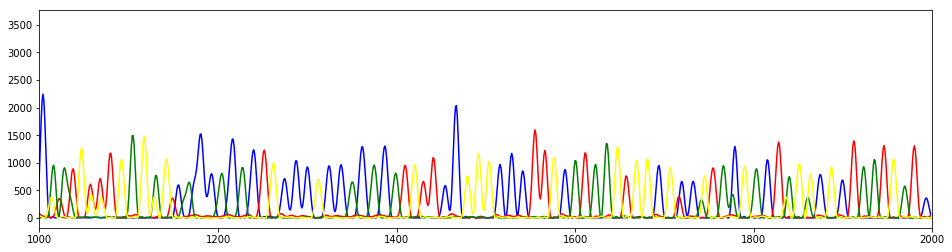

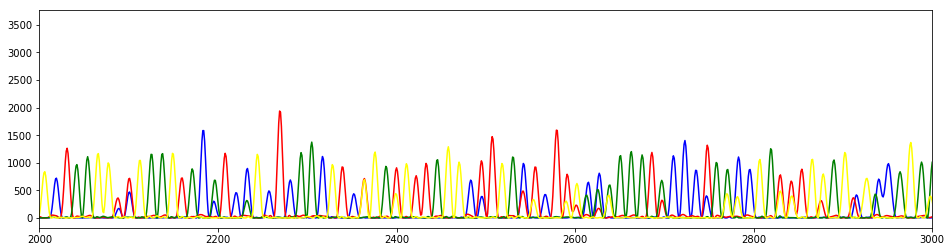

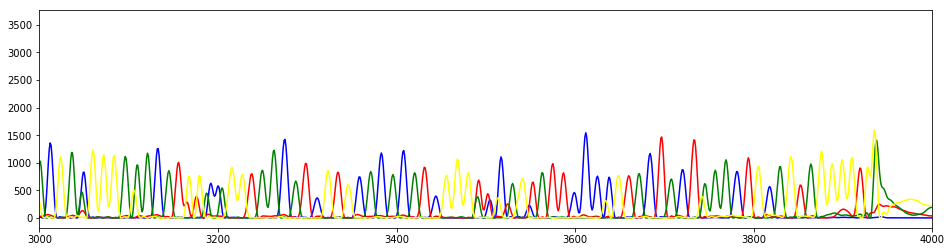

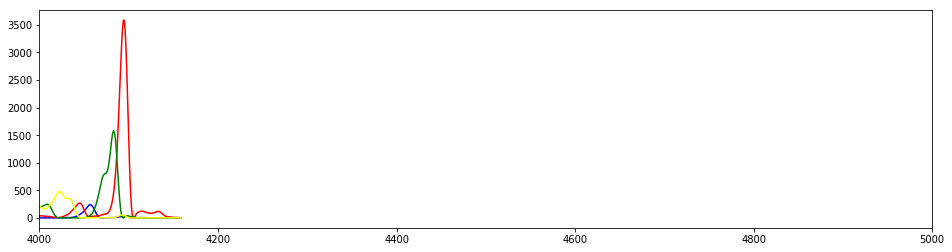

In [14]:
for intervalo in intervalos:
    graficado (intervalo-1000,intervalo)

# Obtencion de la secuencia eliminando valores de baja calidad 
# Trimming
#### tomado de 
#### https://github.com/bow/abifpy

In [15]:
rec= Trace("Nav1.8_(B11)-DG7A_G12_014.ab1")

In [16]:
rec1= Trace('Nav1.8_(B11)-DG7A_G12_014.ab1',  trimming=True)

## Comparando las secuencias de manera visual

In [17]:
print(rec.seq, "\n", rec1.seq)

NGATTTTGGCTACGACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCCCCACCTCCCTCCCGTTA 
 ACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCC


## Observando los valores de calidad

In [18]:
rec.qual

"$%%**&&&&&&%*'71;;.'1T3-+=/+85284<B;;AK38/+:;;@15F92?TM.H\\YT___?3387?9J;LJCLC-68COH=?J39HCRL89/.C54____\\_W____T\\_____\\\\______W_\\_\\_____\\\\_III998??H?9IR?C??C___W__W\\Y____\\C<)8CC__?ITCR4LR8_____33+.83<?9?__C9CJ?C<=-R3-381?FIRCOG>LC?C9?E938??JH.88A?NCHHCC4CCC?9CCCC44..93______R___________7DA>0H:ABTY_2T<9@A___>@K8?C_________YY)))*(*+-%)1('957"

In [19]:
rec1.qual

"71;;.'1T3-+=/+85284<B;;AK38/+:;;@15F92?TM.H\\YT___?3387?9J;LJCLC-68COH=?J39HCRL89/.C54____\\_W____T\\_____\\\\______W_\\_\\_____\\\\_III998??H?9IR?C??C___W__W\\Y____\\C<)8CC__?ITCR4LR8_____33+.83<?9?__C9CJ?C<=-R3-381?FIRCOG>LC?C9?E938??JH.88A?NCHHCC4CCC?9CCCC44..93______R___________7DA>0H:ABTY_2T<9@A___>@K8?C_________Y"

## cuántos nucleotidos eliminó el recorte (trimming)?

In [20]:
print (len(rec.seq), len(rec1.seq))

340 309


## alineamiento de las secuencias para observar en donde se cortaron las secuencias

In [21]:
from Bio import pairwise2
from Bio.SubsMat.MatrixInfo import blosum62

In [22]:
alignments = pairwise2.align.globalds(rec.seq[:93],rec1.seq[:84], blosum62, -10, -0.5)
print(pairwise2.format_alignment(*alignments[0]))

NGATTTTGGCTACGACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCT-----
              |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||     
--------------ACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGG
  Score=475.5



In [23]:
alignments = pairwise2.align.globalds(rec.seq,rec1.seq, blosum62, -10, -0.5)
print(pairwise2.format_alignment(*alignments[0]))

NGATTTTGGCTACGACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCCCCACCTCCCTCCCGTTA
              |||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||                 
--------------ACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGT

In [24]:
alignments = pairwise2.align.globalds(rec.seq[len(rec.seq)-113:],rec1.seq[len(rec1.seq)-100:], blosum62, -10, -0.5)
print(pairwise2.format_alignment(*alignments[0]))

----ATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCCCCACCTCCCTCCCGTTA
    ||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||||                 
TGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCC-----------------
  Score=555.5



In [25]:
rec1.id

'Nav1.8_(B11)-DG7A_G12_014'

In [26]:
print(rec1.id, rec1.seq )

Nav1.8_(B11)-DG7A_G12_014 ACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTCACCGACTTCGGGTGTTACAAACTCTCGTGGTGTGACGGGCGGTGTGTACAAGGCCCGGGAACGTATTCACCGCGGCATGCTGATCCGCGATTACTAGCGATTCCAACTTCATGTAGGCGAGTTGCAGCCTACAATCCGAACTGAGAACGGTTTTATGGGATTGGCTAAACCTCGCGGTCTTGCTGCCCTTTGTACCGTCCATTGTAGCACGTGTGTAGCCCAAGTCATAAGGGGCATGATGATTTGACGTCATCC


## para reconstruir la secuencia y poder guardarla

In [27]:
from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord

In [28]:
secuencia = SeqRecord(Seq((rec1.seq)), id=rec1.id, description=rec1.id)
secuencia

SeqRecord(seq=Seq('ACTTCCCCCAATCATCTGTCCCACCTTAGGCGGCTGGCTCCAAAAGGTTACCTC...TCC', Alphabet()), id='Nav1.8_(B11)-DG7A_G12_014', name='<unknown name>', description='Nav1.8_(B11)-DG7A_G12_014', dbxrefs=[])

In [29]:
SeqIO.write(secuencia, "../fasta/Nav1.2F.fa", "fasta")


1

In [32]:
pwd

'/Users/migueldelrio/Desktop/curso/data/ab1'

In [33]:
cd ../ab2

/Users/migueldelrio/Desktop/curso/data/ab2


In [34]:
ls

Nav1.2F.ab1*   Nav2.2F.ab1*   PET1.8F.ab1*   PET2.8F.ab1*   PETsn1.8F.ab1*
Nav1.8F.ab1*   PET1.2F.ab1*   PET2.2F.ab1*   PETsn1.2F.ab1* PHBb1.2F.ab1*


### Se tienen 10 archivos que hay que procesar

### se utilizan los comandos del sistema operativo para leer archivos de directorios

In [35]:
import os#, sys

In [36]:
lista = os.listdir(path ="./")
lista

['PET1.8F.ab1',
 'PHBb1.2F.ab1',
 'PET1.2F.ab1',
 'Nav2.2F.ab1',
 'PETsn1.2F.ab1',
 'Nav1.8F.ab1',
 'PET2.8F.ab1',
 'PETsn1.8F.ab1',
 'Nav1.2F.ab1',
 'PET2.2F.ab1']

In [37]:
n=0
for row in lista:
    if row[:1]!=".":
        n+=1
        print (row)
print (n, "archivos")


PET1.8F.ab1
PHBb1.2F.ab1
PET1.2F.ab1
Nav2.2F.ab1
PETsn1.2F.ab1
Nav1.8F.ab1
PET2.8F.ab1
PETsn1.8F.ab1
Nav1.2F.ab1
PET2.2F.ab1
10 archivos


# Ejercicio:
### Utilizandola información de la presente bitácora haga un ciclo (loop) para recortar las secuencias eliminando las regiones de baja calidad
### guarde los archivos de manera individual con extensión fasta

In [38]:
n=0
for row in lista:
    if row[:1]!=".":
        n+=1
        print (row, end ="\t")
        rec1= Trace(row,  trimming=True)
        secuencia = SeqRecord(Seq((rec1.seq)), id=rec1.id, description=rec1.id)
        archivo= "../fasta/"+ row[:-4] +".fasta"
        print (archivo)
        SeqIO.write(secuencia, archivo, "fasta")
print (n, "archivos")




PET1.8F.ab1	../fasta/PET1.8F.fasta
PHBb1.2F.ab1	../fasta/PHBb1.2F.fasta
PET1.2F.ab1	../fasta/PET1.2F.fasta
Nav2.2F.ab1	../fasta/Nav2.2F.fasta
PETsn1.2F.ab1	../fasta/PETsn1.2F.fasta
Nav1.8F.ab1	../fasta/Nav1.8F.fasta
PET2.8F.ab1	../fasta/PET2.8F.fasta
PETsn1.8F.ab1	../fasta/PETsn1.8F.fasta
Nav1.2F.ab1	../fasta/Nav1.2F.fasta
PET2.2F.ab1	../fasta/PET2.2F.fasta
10 archivos


## guarde todos los archivos en un solo archivo fasta

In [40]:
!grep ">" ../fasta/secuencias.fasta |wc -l


      20


In [42]:
secuencias= []
n=0
for row in lista:
    if row[:1]!=".":
        n+=1
        print (row)
        rec1= Trace(row,  trimming=True)
        secuencia = SeqRecord(Seq(rec1.seq,
           IUPAC.unambiguous_dna), id=rec1.id, description=rec1.id)
        secuencias.append(secuencia)
archivo= "../fasta/secuencias10.fasta"
print (archivo)
SeqIO.write(secuencias, archivo, "fasta")
print (n, "archivos")
#secuencias

PET1.8F.ab1
PHBb1.2F.ab1
PET1.2F.ab1
Nav2.2F.ab1
PETsn1.2F.ab1
Nav1.8F.ab1
PET2.8F.ab1
PETsn1.8F.ab1
Nav1.2F.ab1
PET2.2F.ab1
../fasta/secuencias10.fasta
10 archivos


## corrobore el archivo secuencias.fasta

## de qué manera podría cambiarle los nombres de descripción a las secuencias?

## utilice el Mega y compare sus resultados

## guarde el archivo en formato del GenBank

In [43]:
mkdir ../genbank

In [44]:
SeqIO.write(secuencias, "../genbank/secuencias.gb", "genbank")


10

### revise el archivo ../genbank/secuencias.gb, explique qué observa

In [45]:
!head -5 ../genbank/secuencias.gb

LOCUS       PET1.8F                  303 bp    DNA              UNK 01-JAN-1980
DEFINITION  PET1.8F.
ACCESSION   PET1.8F
VERSION     PET1.8F
KEYWORDS    .
